# DMINE Ag Resilience - Part 3 - Model Building KNN, Random Forest

# CIRC Annual Conference Year 1 - Data Mining Stream Demonstration
### Erich Seamon and Paul Gessler
### erichs@uidaho.edu
### http://dmine.io
### http://erich.io

The Climate Impacts Research Consortium (CIRC) data mining stream has developed a set of data mining and machine learning processes, in order to provide a basic example of how we might approach climatic impact prediction over space and time.

Our example in this instance is to explore how we might predict economic crop loss over space and time, using data that is extracted from differing sources, transformed, and combined with a response variable that is a approximation of economic crop loss, in dollars.

This notebook provides an overview of our steps for this example, which include:

   1. An overview of the problem, summary of the datasets involved.
    
   2. Data transformation.  What steps do we need to take to transform and combine data into a form that is ready to machine learning techniques?
    
   3. Exploratory Data Analysis.  After transforming the data, a matrix of all values is generated.  From this dataset, what EDA can we perform that will help us to better understand our hypothesis/es?
    
   4. Machine learning model generation, optimization.  Which model works best?
   
   5. Apply most optimized model to a python API for enabling prediction requests.



In [8]:
from sklearn.ensemble import RandomForestRegressor
import PIL
from scipy import stats
import os,sys
import numpy as np
from PIL import Image
from urllib2 import urlopen
import os,sys
from PIL import Image

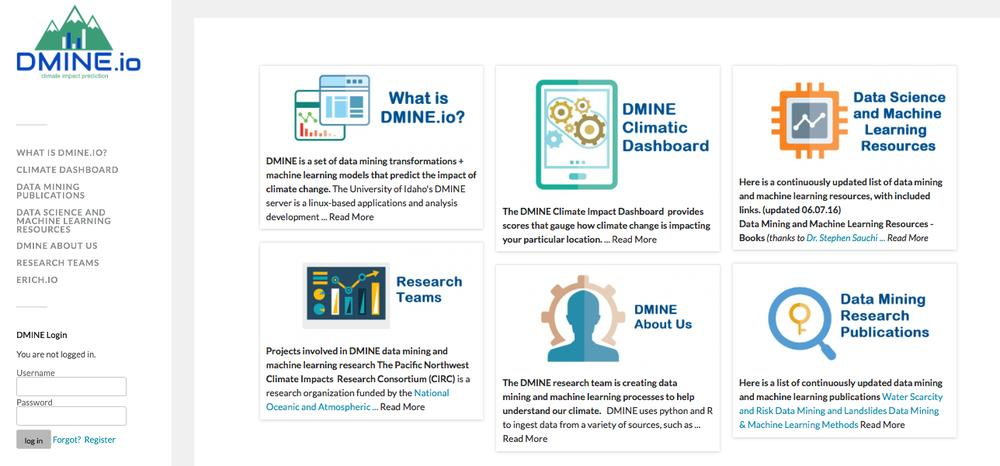

In [2]:
basewidth = 1000
img = Image.open(urlopen("http://dmine.io/wp-content/uploads/2016/06/Screen-Shot-2016-06-10-at-7.35.10-PM.png"))
wpercent = (basewidth / float(img.size[0]))
hsize = int((float(img.size[1]) * float(wpercent)))
img = img.resize((basewidth, hsize), PIL.Image.ANTIALIAS)
img.save("dmine-website-2016.jpg")
jpgfile = Image.open("dmine-website-2016.jpg")
jpgfile

In [1]:
# Read in the dataset and separate it into x and y variables.
# Create the 10 fold cuts that will be used for the different models.
import pandas as pd
import numpy as np
import time
import os
os.chdir("/agmesh-scenarios/scenario_52177/commodity_county/")
train = pd.read_csv('WHEAT.csv', index_col=0)


# create feature matrix (X)
all_cols = ['bi', 'pr', 'pdsi', 'pet', 'erc', 'th', 'vs', 'fm1000', 'fm100', 'srad', 'sph', 'tmmx', 'tmmn', 'rmin', 'rmax', 'loss']
feature_cols = ['bi', 'pr', 'pdsi', 'pet', 'erc', 'th', 'vs', 'fm1000', 'fm100', 'srad', 'sph', 'tmmx', 'tmmn', 'rmin', 'rmax']

X = train[feature_cols]

# create response vector (y)
y = train.loss

train = train[all_cols]

from sklearn.cross_validation import KFold
kf = KFold(len(y), n_folds = 10, random_state = 338)

Before I ran any of the models in the assignment I decided to run a few model selection methods to narrow down the number of variables that I would use.  First I used logistic regression and found all of the variables that are significant at the 0.05 level.  I created a new dataframe from these variables.

### Set up training and testing

In [2]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Random Forest

In this instance, a Random Forest Regressor is run iteratively over 1-100 estimators, recording the accuracy scores and plotting, to see the optimal number of esimators.

In [4]:
from sklearn.ensemble import RandomForestRegressor
rf_range = range(1, 100)
rf_scores = []
for k in rf_range:
    rfreg = RandomForestRegressor(n_estimators=k, random_state=42)
    rfa_fit = rfreg.fit(X,y)
    rfa_scores = rfa_fit.score(X_test, y_test)
    rf_scores.append(rfa_scores.mean())

<IPython.core.display.Javascript object>


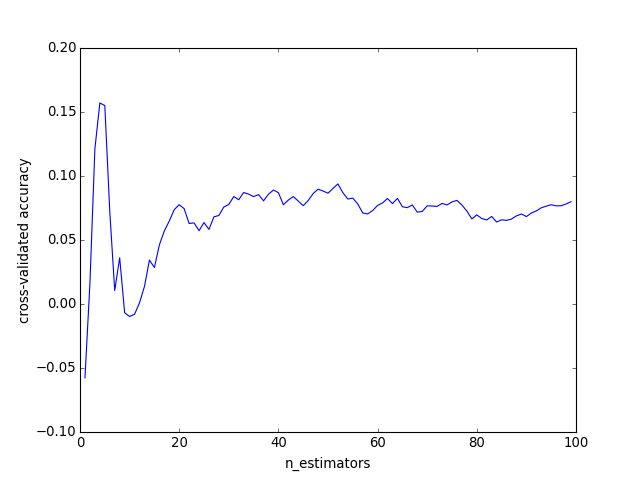

In [6]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib nbagg
# plot n_estimators (x-axis) versus RMSE (y-axis)
plt.plot(rf_range, rf_scores)
plt.xlabel('n_estimators')
plt.ylabel('cross-validated accuracy')

### Optimized Random Forest

In [7]:
from sklearn.ensemble import RandomForestRegressor
rfor = RandomForestRegressor(random_state = 22, max_depth = 25)
start14 = time.time()
rforfit = rfor.fit(X,y)
result14 = rforfit.score(X_test,y_test)
end14 = time.time()
time14 = end14 - start14
print "The AUC for the variables selected with logistic regression is:"
print round(result14, 4)
print "The time it takes to run is:"
print round(time14, 2)


The AUC for the variables selected with logistic regression is:
0.0023
The time it takes to run is:
1.37


## Random Forest Feature Importance

In [8]:
importance = rfor.feature_importances_
importance

array([ 0.03757094,  0.06829343,  0.24060174,  0.07282255,  0.00750653,
        0.03560846,  0.05917706,  0.07710309,  0.08112786,  0.11828006,
        0.05504337,  0.02924658,  0.03318291,  0.03929691,  0.04513851])

In [21]:

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor

from sklearn.grid_search import ParameterGrid
from sklearn.dummy import DummyClassifier, DummyRegressor
def test_regression():
    """Check regression for various parameter settings."""
    
    grid = ParameterGrid({"max_samples": [0.5, 1.0],
                          "max_features": [0.5, 1.0],
                          "bootstrap": [True, False],
                          "bootstrap_features": [True, False]})

    for base_estimator in [None,
                           DummyRegressor(),
                           DecisionTreeRegressor(),
                           KNeighborsRegressor(),
                           SVR()]:
        for params in grid:
            BaggingRegressor(base_estimator=base_estimator,
                             random_state=43,
                             **params).fit(X_train, y_train).predict(X_test)

In [22]:

test_regression()

In [ ]:
def test_regression():
    # Check regression for various parameter settings.
    rng = check_random_state(0)
    
    grid = ParameterGrid({"max_samples": [0.5, 1.0],
                          "max_features": [0.5, 1.0],
                          "bootstrap": [True, False],
                          "bootstrap_features": [True, False]})

    for base_estimator in [None,
                           DummyRegressor(),
                           DecisionTreeRegressor(),
                           KNeighborsRegressor(),
                           SVR()]:
        for params in grid:
            BaggingRegressor(base_estimator=base_estimator,
                             random_state=rng,
                             **params).fit(X_train, y_train).predict(X_test)

The next method I used was K best from sklearn.  I used this method to select a  different set of variables than the variables selected with logistic regression.  I decided to keep about the same number of variables in the K best method as the number of significant variables in logistic regression.

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X_new = SelectKBest(chi2, k = 'all').fit_transform(X, y)

### Null

The null model predicts that everyone will recommit a felony after three years.  Instead of doing 10 fold cross validation I just took all of the y's at once to calculate the AUC.  I did this because every observation in the dataset will appear in a test set exactly once and the predicted probabilities with the null model will always be to classify them as recommit no matter what the training data is.

In [ ]:
from sklearn import metrics
ypred = np.ones(21373)
resultnull = metrics.roc_auc_score(y, ypred)
print "The AUC for the null model is:"
print round(resultnull, 4)

### Ridge CV Regression

In [ ]:
from sklearn.linear_model import RidgeCV
np.mean(cross_val_score(RidgeCV(), X, y, scoring='mean_squared_error'))

### Find Optimal k for K nearest Neighbor

In [ ]:
from sklearn.cross_validation import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
x = range(1, 41)
knnoptim = []
for k in x:
    knno = KNeighborsRegressor(n_neighbors = k)
    kfit = knno.fit(X,y)
    scores = kfit.score(X_test, y_test)
    knnoptim.append(scores)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(x, knnoptim, color = 'orange', linewidth = 2)
plt.xlabel('Value of k')
plt.ylabel('Accuracy')

The max depth occurs at 10

### K Nearest Neighbors rerun with N = 10, as determined from above accuracy testing

In [ ]:
knn = KNeighborsRegressor(n_neighbors=10)
start = time.time()
knnfit = knn.fit(X,y)
result =  knnfit.score(X_test, y_test)
end = time.time()
time0 = end - start
print "The accuracy score selected with logistic regression is:"
print round(result, 4)
print "The time it took to run is:"
print round(time0, 2)


### Find optimal max depth for Regression Decision tree

Here we iterate thru a set of ranges for maximum depth of a decision tree, to see what is the optimum depth

In [ ]:
from sklearn.tree import DecisionTreeRegressor
deep = range(1, 31)
treeoptim = []
for i in deep:
    treee = DecisionTreeRegressor(random_state = 22, max_depth = i)
    treefit = treee.fit(X,y)
    treescore = treefit.score(X_test, y_test)
    treeoptim.append(treescore)

In [ ]:
plt.plot(deep, treeoptim, color = 'coral', linewidth = 2)
plt.xlabel('Depth of tree')
plt.ylabel('Accuracy')

The best max depth occurs at 7.

### Optimized Regression Decision Tree

Here we run a regression decision tree with a max depth of 20, as indicated from above accuracy testing

In [ ]:
treee = DecisionTreeRegressor(random_state = 22, max_depth = 20)
treefit = treee.fit(X,y)
treescore = treefit.score(X_test, y_test)
print "The accuracy score for variables selected using a Regression Decision Tree is:"
treescore
   

## Ensemble methods

### Bagging

In [ ]:
from sklearn.ensemble import BaggingRegressor
bag = BaggingRegressor(max_samples = 10000, random_state = 22)
start12 = time.time()
bagfit = bag.fit(X,y)
result12 = bagfit.score(X_test, y_test)
end12 = time.time()
time12 = end12 - start12
print "The AUC for the variables selected with logistic regression is:"
print round(result12, 4)
print "The time it takes to run is:"
print round(time12, 2)


I used the same max depth from the parameter tuning from regression  tree.

## The Method that I chose in addition to the others is extremely randomized trees    
I chose this method after reading about multiple different methods on the scikit learn website.  I decided to use it because the process that it uses to create the trees is counterintuitive to me and I wanted to see how well it worked against the other methods. Below is some information from the scikit learn website.

As in random forests, a random subset of candidate features is used, but instead of looking for the most discriminative thresholds, thresholds are drawn at random for each candidate feature and the best of these randomly-generated thresholds is picked as the splitting rule. This usually allows to reduce the variance of the model a bit more, at the expense of a slightly greater increase in bias:

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
etree = ExtraTreesRegressor(random_state = 40, min_samples_split=1, bootstrap = True, max_depth = 20)
start16 = time.time()
etreefit = etree.fit(X,y)
result16 = etreefit.score(X_test, y_test)
end16 = time.time()
time16 = end16 - start16
print "The AUC for the variables selected with logistic regression is:"
print round(result16, 4)
print "The time it takes to run is:"
print round(time16, 2)


## ROC

In [ ]:
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
xTrain, xTest, yTrain, yTest = train_test_split(crim[sigVars], y, random_state=40)
## Logistic Regression
lreg.fit(xTrain, yTrain)
yPredProbLR = lreg.predict_proba(xTest)[:, 1]
## KNN
knn.fit(xTrain, yTrain)
yPredProbKNN = knn.predict_proba(xTest)[:, 1]
## Naive Bayes
bnb.fit(xTrain, yTrain)
yPredProbNB = bnb.predict_proba(xTest)[:, 1]
## SVM Gaussian
GAU = SVC(random_state = 22, kernel = 'rbf', probability=True)
GAU.fit(xTrain, yTrain)
yPredProbGAU = GAU.predict_proba(xTest)[:, 1]
## SVM Polynomial
POL = SVC(random_state = 22, kernel = 'poly', probability=True)
POL.fit(xTrain, yTrain)
yPredProbPOL = POL.predict_proba(xTest)[:, 1]
## Classification Tree
tre.fit(xTrain, yTrain)
yPredProbTRE = tre.predict_proba(xTest)[:, 1]
## Bagging
bag.fit(xTrain, yTrain)
yPredProbBAG = bag.predict_proba(xTest)[:, 1]
## Random Forest
rfor.fit(xTrain, yTrain)
yPredProbRFOR = rfor.predict_proba(xTest)[:, 1]
## Extremely Random Trees
etree.fit(xTrain, yTrain)
yPredProbETREE = etree.predict_proba(xTest)[:, 1]
## Null
yPredProbNULL = np.ones(5344) # Length of the test dataset
## variables for ROC
fLR, tLR, thresholds = metrics.roc_curve(yTest, yPredProbLR)
fKNN, tKNN, thresholds = metrics.roc_curve(yTest, yPredProbKNN)
fNB, tNB, thresholds = metrics.roc_curve(yTest, yPredProbNB)
fGAU, tGAU, thresholds = metrics.roc_curve(yTest, yPredProbGAU)
fPOL, tPOL, thresholds = metrics.roc_curve(yTest, yPredProbPOL)
fTRE, tTRE, thresholds = metrics.roc_curve(yTest, yPredProbTRE)
fBAG, tBAG, thresholds = metrics.roc_curve(yTest, yPredProbBAG)
fRFOR, tRFOR, thresholds = metrics.roc_curve(yTest, yPredProbRFOR)
fETREE, tETREE, thresholds = metrics.roc_curve(yTest, yPredProbETREE)
fNULL, tNULL, thresholds = metrics.roc_curve(yTest, yPredProbNULL)
plt.plot(fLR, tLR, label='Logistic Regression', color='orange')
plt.plot(fKNN, tKNN, label='KNN', color='gray')
plt.plot(fNB, tNB, label='Naive Bayes', color='cyan')
plt.plot(fGAU, tGAU, label='SVM Gaussian', color='black')
plt.plot(fPOL, tPOL, label='SVM Polynomial', color='green')
plt.plot(fTRE, tTRE,label='Classification Tree', color='red')
plt.plot(fBAG, tBAG, label='Bagging', color='purple')
plt.plot(fRFOR, tRFOR, label='Random Forest', color='brown')
plt.plot(fETREE, tETREE, label='Extremely Random Trees', color='seagreen')
plt.plot(fNULL, tNULL, label='Null', color='salmon')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

### End results and times
To make the graph simpler and becuase the results from linear regression and k best where so close I only plotted the results from the variables that were selected with logistic regression. Because of the large difference in time and AUC and the wide range of time it took to run the models I took the log of time to shrink the range and I exponentiated AUC to make the graph more readable.

In [ ]:
from math import log
from math import exp
import pylab
plt.plot([1, 1.5], [exp(result4), log(time4)], label='Logistic Regression', color='orange')
plt.plot([1, 1.5], [exp(result), log(time0)], label='KNN', color='gray')
plt.plot([1, 1.5], [exp(result2), log(time2)], label='Naive Bayes', color='cyan')
plt.plot([1, 1.5], [exp(result6), log(time6)], label='SVM Gaussian', color='black')
plt.plot([1, 1.5], [exp(result8), log(time8)], label='SVM Polynomial', color='green')
plt.plot([1, 1.5], [exp(result10), log(time10)], label='Classification Tree', color='red')
plt.plot([1, 1.5], [exp(result12), log(time12)], label='Bagging', color='purple')
plt.plot([1, 1.5], [exp(result14), log(time14)], label='Random Forest', color='brown')
plt.plot([1, 1.5], [exp(result16), log(time16)], label='Extremely Random Trees', color='seagreen')
plt.plot([1, 1.5], [0.5, 0], label='Null', color='salmon')
pylab.xlim([0.9 , 1.6])
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.xlabel('AUC/Time')

## Conclusions for the criminal dataset

It was interesting to see that picking the significant variables from an initial logistic regression model performed better than the K best method of selecting variables in all of the models except for bagging.  In the bagging model the AUC better for K best than logistic regression.

I was suprised to see that extremely randomized trees performed better than bagging and classification tree.  Logistic regression performed the best of all the models.  I did not expect this model to perform the best.  

# Dataset 2

Because the music file is so big I saved it to my computer before I read the json file.  This made reading it in much faster than it otherwise would have been.  In the cell below the commented lines are the ones I used to create the json file on my machine.

I didn't perform parameter tuning to this dataset because of the amount of time that it took to run the models that had parameters to tune.  I used the top 1000 words for the sparse matrix.

In [ ]:
#from urllib import urlretrieve
#urlretrieve('https://www.webpages.uidaho.edu/erichs/music.json', 'music.json')
import json
with open('music.json', 'rU') as f:
    data = [json.loads(row) for row in f]
    data2 = pd.DataFrame(data)
music5_1 = data2[(data2.overall==5) | (data2.overall==1)]
from sklearn.feature_extraction.text import CountVectorizer
Xmusic = music5_1.reviewText
ymusic = music5_1.overall
ybin = np.where(ymusic==5, 1, 0)
kfm = KFold(len(ymusic), n_folds = 10, random_state = 338)
vect = CountVectorizer(max_features = 1000)

### Null

In [ ]:
ypredm = np.ones(131960)
resultnullm = metrics.roc_auc_score(ybin, ypredm)
print "The AUC is:"
print round(resultnullm, 4)

### K Nearest Neighbors

In [ ]:
knn = KNeighborsClassifier(n_neighbors=10)
start18 = time.time()
result18 = cross_val_score(knn, vect.fit_transform(Xmusic), ybin, cv = kfm, scoring = 'roc_auc').mean()
end18 = time.time()
print "The AUC is:"
print round(result18, 4)
print "The time it took to run is:"
print round(end18 - start18, 2)

### Naive Bayes

In [ ]:
start19 = time.time()
result19 = cross_val_score(bnb, vect.fit_transform(Xmusic), ybin, cv = kfm, scoring = 'roc_auc').mean()
end19 = time.time()
print "The AUC is:"
print round(result19, 4)
print "The time it took to run is:"
print round(end19 - start19, 2)

### Logistic Regression

In [ ]:
start20 = time.time()
result20 = cross_val_score(lreg, vect.fit_transform(Xmusic), ybin, cv = kfm, scoring = 'roc_auc').mean()
end20 = time.time()
print "The AUC is:"
print round(result20, 4)
print "The time it took to run is:"
print round(end20 - start20, 2)

### SVM Gaussian Kernel

In [ ]:
start21 = time.time()
result21 = cross_val_score(gau, vect.fit_transform(Xmusic), ybin, cv = kfm, scoring = 'roc_auc').mean()
end21 = time.time()
print "The AUC is:"
print round(result21, 4)
print "The time it took to run is:"
print round(end21 - start21, 2)

### SVM Polynomial Kernel

In [ ]:
start22 = time.time()
result22 = cross_val_score(pol, vect.fit_transform(Xmusic), ybin, cv = kfm, scoring = 'roc_auc').mean()
end22 = time.time()
print "The AUC is:"
print round(result22, 4)
print "The time it took to run is:"
print round(end22 - start22, 2)

### Classification Tree

In [ ]:
start23 = time.time()
result23 = cross_val_score(tre, vect.fit_transform(Xmusic), ybin, cv = kfm, scoring = 'roc_auc').mean()
end23 = time.time()
print "The AUC is:"
print round(result23, 4)
print "The time it took to run is:"
print round(end23 - start23, 2)

## Ensemble Methods

### Bagging

In [ ]:
start24 = time.time()
result24 = cross_val_score(bag, vect.fit_transform(Xmusic), ybin, cv = kfm, scoring = 'roc_auc').mean()
end24 = time.time()
print "The AUC is:"
print round(result24, 4)
print "The time it took to run is:"
print round(end24 - start24, 2)

### Random Forest

In [ ]:
start25 = time.time()
result25 = cross_val_score(rfor, vect.fit_transform(Xmusic), ybin, cv = kfm, scoring = 'roc_auc').mean()
end25 = time.time()
print "The AUC is:"
print round(result25, 4)
print "The time it took to run is:"
print round(end25 - start25, 2)

### Extremely Randomized Trees

In [ ]:
start26 = time.time()
result26 = cross_val_score(etree, vect.fit_transform(Xmusic), ybin, cv = kfm, scoring = 'roc_auc').mean()
end26 = time.time()
print "The AUC is:"
print round(result26, 4)
print "The time it took to run is:"
print round(end26 - start26, 2)

## ROC

In [ ]:
xTrainM, xTestM, yTrainM, yTestM = train_test_split(vect.fit_transform(Xmusic), ybin, random_state=40)
## Logistic Regression
lreg.fit(xTrainM, yTrainM)
yPredProbLRM = lreg.predict_proba(xTestM)[:, 1]
## KNN
knn.fit(xTrainM, yTrainM)
yPredProbKNNM = knn.predict_proba(xTestM)[:, 1]
## Naive Bayes
bnb.fit(xTrainM, yTrainM)
yPredProbNBM = bnb.predict_proba(xTestM)[:, 1]
## SVM Gaussian
GAU = SVC(random_state = 22, kernel = 'rbf', probability=True)
GAU.fit(xTrainM, yTrainM)
yPredProbGAUM = GAU.predict_proba(xTestM)[:, 1]
## SVM Polynomial
POL = SVC(random_state = 22, kernel = 'poly', probability=True)
POL.fit(xTrainM, yTrainM)
yPredProbPOLM = POL.predict_proba(xTestM)[:, 1]
## Classification Tree
tre.fit(xTrainM, yTrainM)
yPredProbTREM = tre.predict_proba(xTestM)[:, 1]
## Bagging
bag.fit(xTrainM, yTrainM)
yPredProbBAGM = bag.predict_proba(xTestM)[:, 1]
## Random Forest
rfor.fit(xTrainM, yTrainM)
yPredProbRFORM = rfor.predict_proba(xTestM)[:, 1]
## Extremely Random Trees
etree.fit(xTrainM, yTrainM)
yPredProbETREEM = etree.predict_proba(xTestM)[:, 1]
## Null
yPredProbNULLM = np.ones(12500) # Length of the test dataset
## variables for ROC
fLRM, tLRM, thresholds = metrics.roc_curve(yTestM, yPredProbLRM)
fKNNM, tKNNM, thresholds = metrics.roc_curve(yTestM, yPredProbKNNM)
fNBM, tNBM, thresholds = metrics.roc_curve(yTestM, yPredProbNBM)
fGAUM, tGAUM, thresholds = metrics.roc_curve(yTestM, yPredProbGAUM)
fPOLM, tPOLM, thresholds = metrics.roc_curve(yTestM, yPredProbPOLM)
fTREM, tTREM, thresholds = metrics.roc_curve(yTestM, yPredProbTREM)
fBAGM, tBAGM, thresholds = metrics.roc_curve(yTestM, yPredProbBAGM)
fRFORM, tRFORM, thresholds = metrics.roc_curve(yTestM, yPredProbRFORM)
fETREEM, tETREEM, thresholds = metrics.roc_curve(yTestM, yPredProbETREEM)
fNULLM, tNULLM, thresholds = metrics.roc_curve(yTestM, yPredProbNULLM)
plt.plot(fLRM, tLRM, label='Logistic Regression', color='orange')
plt.plot(fKNNM, tKNNM, label='KNN', color='gray')
plt.plot(fNBM, tNBM, label='Naive Bayes', color='cyan')
plt.plot(fGAUM, tGAUM, label='SVM Gaussian', color='black')
plt.plot(fPOLM, tPOLM, label='SVM Polynomial', color='green')
plt.plot(fTREM, tTREM, label='Classification Tree', color='red')
plt.plot(fBAGM, tBAGM, label='Bagging', color='purple')
plt.plot(fRFORM, tRFORM, label='Random Forest', color='brown')
plt.plot(fETREEM, tETREEM, label='Extremely Random Trees', color='seagreen')
plt.plot(fNULLM, tNULLM, label='Null', color='salmon')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

### End Results and Times
I took the log of time again and I exponentiated the AUC to get the graph more readable. 

In [ ]:
from math import exp
plt.plot([1, 1.5], [exp(result20), log(end20 - start20)], label='Logistic Regression', color='orange')
plt.plot([1, 1.5], [exp(result18), log(end18 - start18)], label='KNN', color='coral')
plt.plot([1, 1.5], [exp(result19), log(end19 - start19)], label='Naive Bayes', color='cyan')
plt.plot([1, 1.5], [exp(result21), log(end21 - start21)], label='SVM Gaussian', color='black')
plt.plot([1, 1.5], [exp(result22), log(end22 - start22)], label='SVM Polynomial', color='green')
plt.plot([1, 1.5], [exp(result23), log(end23 - start23)], label='Classification Tree', color='red')
plt.plot([1, 1.5], [exp(result24), log(end24 - start24)], label='Bagging', color='purple')
plt.plot([1, 1.5], [exp(result25), log(end25 - start25)], label='Random Forest', color='brown')
plt.plot([1, 1.5], [exp(result26), log(end26 - start26)], label='Extremely Random Trees', color='seagreen')
plt.plot([1, 1.5], [exp(0.5), 0], label='Null', color='salmon')
pylab.xlim([0.9 , 1.6])
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.xlabel('AUC/Time')

## Conclusions for the Music dataset

I did not expect to see KNN do so poorly for this dataset.  It is quite a bit lower than the other models and in the criminal dataset it performed very well compaired to the other models.

Logistic regress fell behind SVM gaussian kernel and naive bayes. I did not expect to see naive bayes outperform logistics regression.  Another result that I thought was interesting was to see svm polynomial kernel do so much worse than the gaussian kernel. I expected them to be much closer. 